# Función Rastrigin

Función tomada de la página [www.sfu.ca](http://www.sfu.ca/~ssurjano/rastr.html)

<img src="./images/rastr.png">
<img src="./images/rastr2.png">

Es una función continua semiconvexa y usualmente se evalua en el hipercubo $x_i$ ∈ $[-5.12, 5.12]$, para todo i = 1, …, d.

La función Rastrigin tiene el mínimo global en el punto $f(x^*) = 0$ en $x^* \epsilon [0,...,0]$

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import numpy.linalg as ln
import pandas as pd
import scipy as sp
import scipy.optimize
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.max_colwidth = 300
from optimizador_BFGS import *

### Función caso 2 dimensiones

In [2]:
#Definición de la función Ackley
def f_rastrigin(x):
    """
    x es un array
    """
    return 20 + np.power(x[0],2) - 10 * np.cos(2*np.pi*x[0]) + np.power(x[1],2) - 10 * np.cos(2*np.pi*x[1]) 

In [3]:
#ejemplo de evaluacion de la funcion esfera en 2 dimensiones en el punto (1,1)
print (f_rastrigin([1,1]))

2.0


### Función caso de N dimensiones

In [4]:
def fN_rastrigin(x):
    """
    x es un array
    """
    #print(x)
    d = len(x)
    pi = np.pi
    
    x = np.array(x)    
    
    
    funcion = 10*d + np.sum(np.power(x,2) - 10 * np.cos(2 * pi * x))
    
    return funcion  

In [5]:
print (fN_rastrigin([1,1]))

2.0


Se observa que el resultado para el caso N=2 es igual a la implementación para 2 dimensiones. A continuación se realizan las gráficas de contorno y de la función

#### Gráfica de contorno de la función Rosenbrock de dos dimensiones

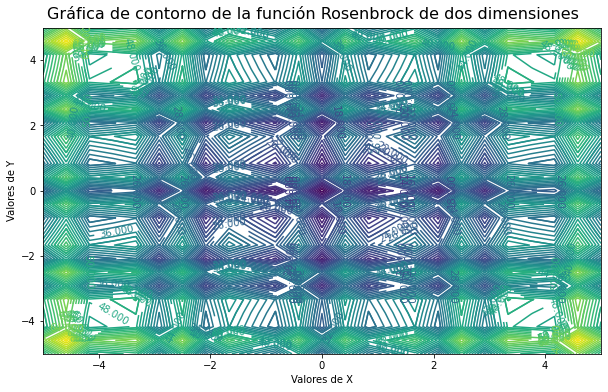

In [6]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x = y = np.linspace(-5, 5, 25)
X,Y = np.meshgrid(x,y)
Z = f_rastrigin([X,Y])
cs = ax.contour(X, Y, Z, 50) #numero de niveles del contorno
ax.clabel(cs, fontsize=10) #valores de Z

#plt.title('Gráfica de contorno de la función Ackley de dos dimensiones')
plt.figtext(.5,.9,'Gráfica de contorno de la función Rosenbrock de dos dimensiones', fontsize=16, ha='center')
plt.xlabel('Valores de X')
plt.ylabel('Valores de Y')

cs = ax.contour(X,Y,Z)
plt.show()

Text(0.5, 0.9, 'Gráfica de superficie de la función Rosenbrock de dos dimensiones')

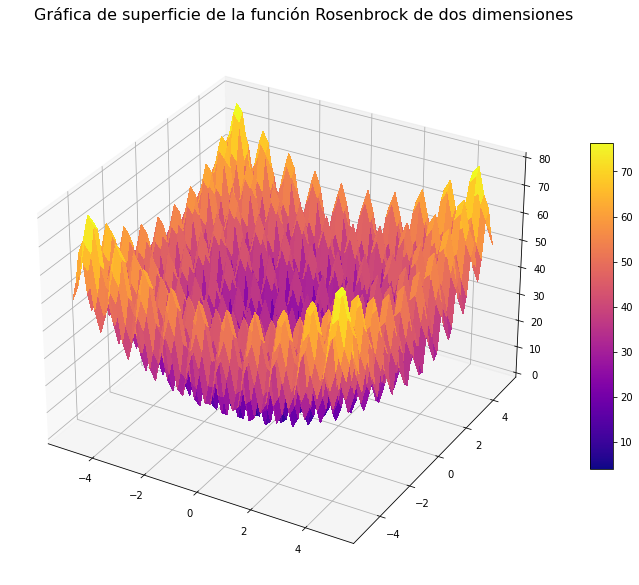

In [7]:
from matplotlib import cm

fig = plt.figure(figsize=(14,10))
ax = plt.axes(projection='3d')


x = y = np.linspace(-5, 5, 50)
X,Y = np.meshgrid(x,y)
Z = f_rastrigin([X,Y])
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap=cm.plasma,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 80)
fig.colorbar(surf, shrink=0.6, aspect=14)
plt.figtext(.5,.9,'Gráfica de superficie de la función Rosenbrock de dos dimensiones', fontsize=16, ha='center')

### Optimización con nuestra implementacion del algoritmo BFGS dela función Rosenbrock - Dimensión 2

In [8]:
X0 = [-5,5]
var_sensibilidad  = np.around(np.linspace(0.01, 1.3, num=25, endpoint=True), decimals=3).tolist()

In [9]:
Rastrigin2_min, Rastrigin2_max, Rastrigin2_prom, Rastrigin2_med, datos_Rastrigin2 = evaluador(fN_rastrigin, X0, var_sensibilidad)

In [10]:
print (f"El minimo de los minimo valor de la función en las 25 optimizaciones es: {Rastrigin2_min}")
print ("El máximo de los minimo valor de la función en las 25 optimizaciones es: {}".format(Rastrigin2_max))
print ("El promedio de los minimos de la función en las 25 optimizaciones es: " + str(Rastrigin2_prom))
print ((f"La mediana del minimo del valor de la función en las 25 optimizaciones es: {Rastrigin2_med}"))
datos_Rastrigin2

El minimo de los minimo valor de la función en las 25 optimizaciones es: 99.50134624242482
El máximo de los minimo valor de la función en las 25 optimizaciones es: 4563.995726554056
El promedio de los minimos de la función en las 25 optimizaciones es: 700.7358834420514
La mediana del minimo del valor de la función en las 25 optimizaciones es: 469.83111743641126


,Paso,Iteraciones para convergencia,gradiente en el minimo,F(X) en el minimo,Coordenadas
0,0.010,874,0.009918,219.877964,"[-13.931902652735353, 4.969709624995667]"
1,0.064,1000,71.135129,4563.995727,"[-66.73497304824494, 9.943707662428311]"
2,0.118,874,0.009039,1076.052502,"[-25.657130032862995, 19.602291997471028]"
3,0.171,417,0.009167,1019.272215,"[-30.721362394980357, -7.964223840508232]"
4,0.225,423,0.009220,573.288110,"[-10.559514998043992, -20.61893334734161]"
5,0.279,58,0.009654,99.501346,"[-9.953732814644246, -0.005004763734680794]"
6,0.332,53,0.007412,1223.029847,"[17.58960877203454, 29.69215384616441]"
7,0.386,46,0.007850,227.451968,"[12.560509919948016, -5.533138475353611]"
8,0.440,34,0.005856,1179.382836,"[30.776972312979396, 14.916220322281609]"
9,0.494,81,0.005759,114.080094,"[-7.964238604249927, 5.523166579317183]"


<AxesSubplot:>

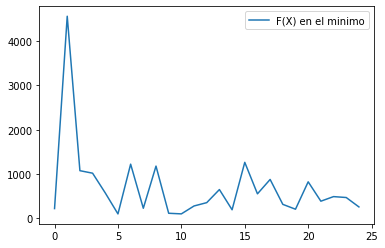

In [11]:
datos_Rastrigin2[['F(X) en el minimo']].plot()

### Optimización con nuestra implementacion del algoritmo BFGS dela función Rosenbrock - Dimensión 5

In [12]:
X0_5 = [-5,5, 5, 5, 5]
var_sensibilidad  = np.around(np.linspace(0.01, 1.3, num=25, endpoint=True), decimals=3).tolist()

In [13]:
Rastrigin5_min, Rastrigin5_max, Rastrigin5_prom, Rastrigin5_med, datos_Rastrigin5 = evaluador(fN_rastrigin, X0_5, var_sensibilidad)

In [14]:
print (f"El minimo de los minimo valor de la función en las 25 optimizaciones es: {Rastrigin5_min}")
print ("El máximo de los minimo valor de la función en las 25 optimizaciones es: {}".format(Rastrigin5_max))
print ("El promedio de los minimos de la función en las 25 optimizaciones es: " + str(Rastrigin5_prom))
print ((f"La mediana del minimo del valor de la función en las 25 optimizaciones es: {Rastrigin5_med}"))
datos_Rastrigin5

El minimo de los minimo valor de la función en las 25 optimizaciones es: 53.75186052810895
El máximo de los minimo valor de la función en las 25 optimizaciones es: 109644.4531961141
El promedio de los minimos de la función en las 25 optimizaciones es: 5884.374019780428
La mediana del minimo del valor de la función en las 25 optimizaciones es: 1046.5867537823965


,Paso,Iteraciones para convergencia,gradiente en el minimo,F(X) en el minimo,Coordenadas
0,0.010,958,0.009956,371.076720,"[-13.931901613854624, 5.523141749045005, 5.523145145954724, 5.5231454734483085, 4.9696914690070955]"
1,0.064,2500,54.102500,3521.207686,"[-17.818236520990236, 33.71474722383358, 10.985501456577879, -43.79656829502135, -1.0973326236029426]"
2,0.118,2500,209.589815,9805.301837,"[-15.07968549378866, -31.14315307212078, 83.94943388856362, 19.929579946993233, 34.01197541734047]"
3,0.171,2500,8.658258,268.743649,"[-5.961972042575029, -3.006604124954281, -1.9908691440281676, 4.973120940886691, -13.936638151679404]"
4,0.225,1091,0.009948,1117.184786,"[-1.9949025137476708, -20.88921961869296, 9.943701356892781, 16.90450829470282, 16.904526843006728]"
5,0.279,199,0.008340,2436.871845,"[24.84971565606255, -5.9745677807696325, 21.87236850757126, 23.857658010038456, 26.831932476893034]"
6,0.332,227,0.007240,2582.819926,"[-28.688184032551305, -14.581792519223951, 6.528333724738366, 26.65632752115216, 26.65634119545367]"
7,0.386,363,0.006518,894.356831,"[-10.948366405612239, 15.910434603480311, -8.959001523411912, -20.889242204833096, -0.005013963293236266]"
8,0.440,523,0.006571,1658.430853,"[27.821769018739474, -6.969416347721847, -18.60586653598047, -19.61229184482744, -7.9642098295321295]"
9,0.494,440,0.009607,821.108011,"[9.943725765316398, 2.507741643011291, -22.875200375165672, 0.989972564509226, -12.937472390349924]"


<AxesSubplot:>

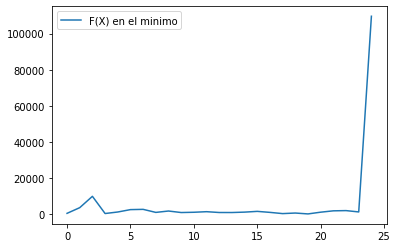

In [15]:
datos_Rastrigin5[['F(X) en el minimo']].plot()

### Optimización con nuestra implementacion del algoritmo BFGS dela función Rosenbrock - Dimensión 10

In [16]:
X0_10 = [-5,5, 5, 5, 5, 5, 5, 5, 5, 5]
var_sensibilidad  = np.around(np.linspace(0.01, 1.3, num=25, endpoint=True), decimals=3).tolist()

In [17]:
Rastrigin10_min, Rastrigin10_max, Rastrigin10_prom, Rastrigin10_med, datos_Rastrigin10 = evaluador(fN_rastrigin, X0_10, var_sensibilidad)

In [18]:
print (f"El minimo de los minimo valor de la función en las 25 optimizaciones es: {Rastrigin10_min}")
print ("El máximo de los minimo valor de la función en las 25 optimizaciones es: {}".format(Rastrigin10_max))
print ("El promedio de los minimos de la función en las 25 optimizaciones es: " + str(Rastrigin10_prom))
print ((f"La mediana del minimo del valor de la función en las 25 optimizaciones es: {Rastrigin10_med}"))
datos_Rastrigin10

El minimo de los minimo valor de la función en las 25 optimizaciones es: 488.204843049587
El máximo de los minimo valor de la función en las 25 optimizaciones es: 318012.94697477855
El promedio de los minimos de la función en las 25 optimizaciones es: 35890.153624340564
La mediana del minimo del valor de la función en las 25 optimizaciones es: 2871.968149507093


,Paso,Iteraciones para convergencia,gradiente en el minimo,F(X) en el minimo,Coordenadas
0,0.010,1013,0.009906,488.204843,"[-13.9319014819282, 5.964578168976867, 4.969695727127766, 5.523145632106684, 4.969694763422643, 4.969692152151427, 4.969694301078142, 5.964560887330229, 5.964562683521185, 5.964564506881155]"
1,0.064,5000,522.701452,53715.472591,"[6.8116461537072555, 90.10272794040264, -80.4801768179792, -128.4959032467312, 46.31620235238844, -24.991144595104576, 84.1706427149396, 93.46050791305579, -55.753654705631945, 27.387121116744947]"
2,0.118,5000,358.601527,29553.780553,"[22.728239827626638, -0.728215037688943, 89.8951447471422, 19.87435894947734, -115.38976516582741, -34.711157470145636, -12.281604052794115, -53.67257582176819, -35.69689819607528, 40.3003080438762]"
3,0.171,5000,371.249089,35627.917159,"[-4.787185980574683, 101.68703690312176, 123.51280766504262, -71.94478371466127, 36.13976076300085, 15.368217311480025, -48.71451439831344, -1.1988840036154498, -19.110262234311662, -21.30641239629477]"
4,0.225,5000,277.027860,17004.946007,"[-54.73896983074786, 26.520103468518208, 36.007365808310034, -13.494951310764442, -64.56711185340477, 38.211759130618816, -42.37655855635948, -8.842632679726062, 64.52537858400835, 6.138135134471755]"
5,0.279,5000,251.117698,19233.768221,"[-31.965055289250557, 88.01567687859813, -34.91498065726262, -46.74257855596119, 30.01039996084854, 37.13106601721885, -17.830579488356605, -62.83301894784862, -17.90349153175433, -12.951667386697515]"
6,0.332,5000,171.831815,10029.417346,"[43.105623880174576, -3.8046006662122416, 48.8553915299722, -47.93085490821945, 25.62189582916529, -15.48244623321743, 35.712108634078916, -29.91028388905019, 16.493304876194532, -5.582430470987285]"
7,0.386,3014,0.009603,1736.704361,"[11.554974496453065, -10.559530016558893, 7.533560911581616, -3.5228606374579825, 0.49754847426279275, -5.533163597334797, -11.564968713989085, -28.688192766741274, -15.58761428000621, 1.5026492504768652]"
8,0.440,1661,0.009010,2871.968150,"[-13.931885252161328, -0.5075324241434358, 27.821751414309524, 6.95942116041847, -18.60587934549118, 25.841198520575645, -4.979686482581109, -6.969415218376292, -18.902252095492262, 18.892255194890566]"
9,0.494,5000,633.891317,113283.137916,"[-70.51398705041203, -118.44250068627713, 54.10508666828302, -42.92617955961953, -34.068593828488844, 10.249922148507789, -48.507101816509305, 219.81577882436787, 17.003974139502905, -192.88211719215906]"


<AxesSubplot:>

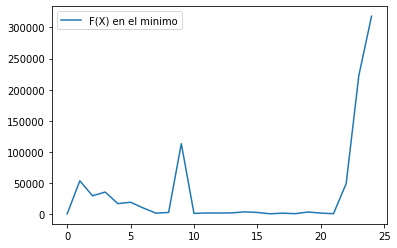

In [19]:
datos_Rastrigin10[['F(X) en el minimo']].plot()

### Caso con puntos de inicio aleatorios

In [20]:
#generación de puntos aleatorios para 2, 5, y 10 dimensiones
np.random.seed(seed=1)

In [21]:
X0_2_a = np.random.uniform(low=-5, high=5, size=2)
X0_2_a

array([-0.82977995,  2.20324493])

In [22]:
X0_5_a = np.random.uniform(low=-5, high=5, size=5)
X0_5_a

array([-4.99885625, -1.97667427, -3.53244109, -4.07661405, -3.13739789])

In [23]:
X0_10_a = np.random.uniform(low=-5, high=5, size=10)
X0_10_a

array([-1.54439273, -1.03232526,  0.38816734, -0.80805486,  1.852195  ,
       -2.9554775 ,  3.78117436, -4.72612407,  1.7046751 , -0.82695198])

In [24]:
var_sensibilidad  = np.around(np.linspace(0.01, 2, num=25, endpoint=True), decimals=3).tolist()

In [25]:
Rastrigin2a_min, Rastrigin2a_max, Rastrigin2a_prom, Rastrigin2a_med, datos_Rastrigin2a = evaluador(fN_rastrigin, X0_2_a, var_sensibilidad)
print (f"El minimo de los minimo valor de la función en las 25 optimizaciones es: {Rastrigin2a_min}")
print ("El máximo de los minimo valor de la función en las 25 optimizaciones es: {}".format(Rastrigin2a_max))
print ("El promedio de los minimos de la función en las 25 optimizaciones es: " + str(Rastrigin2a_prom))
print ((f"La mediana del minimo del valor de la función en las 25 optimizaciones es: {Rastrigin2a_med}"))
datos_Rastrigin2a

El minimo de los minimo valor de la función en las 25 optimizaciones es: 29.20596529475129
El máximo de los minimo valor de la función en las 25 optimizaciones es: 362665882009.05743
El promedio de los minimos de la función en las 25 optimizaciones es: 14506635588.642185
La mediana del minimo del valor de la función en las 25 optimizaciones es: 193.01862844792498


,Paso,Iteraciones para convergencia,gradiente en el minimo,F(X) en el minimo,Coordenadas
0,0.010,844,9.914447e-03,2.920597e+01,"[-0.5075225502647006, 2.9798451406002746]"
1,0.093,113,9.200149e-03,7.667657e+01,"[2.507767555839075, 5.523149208846278]"
2,0.176,54,8.331950e-03,1.930186e+02,"[4.969684982022687, 12.927486848976136]"
3,0.259,39,8.204028e-03,4.345621e+02,"[19.60227590754456, 3.5128789083819245]"
4,0.342,49,6.626913e-03,1.369855e+02,"[-2.5177368268412352, 9.544177955327163]"
5,0.425,38,9.241860e-03,1.148720e+02,"[8.538825984276352, 1.5026587789471317]"
6,0.507,22,6.086203e-03,8.693811e+02,"[26.656308983277146, 11.932958269106287]"
7,0.590,26,5.158958e-03,5.170182e+02,"[-21.625810225695037, 3.512856991371942]"
8,0.673,33,4.145307e-03,5.858451e+01,"[2.507751940688043, 3.5128537262284705]"
9,0.756,49,6.345585e-03,1.353192e+02,"[5.964570802234579, -9.953724219692136]"


<AxesSubplot:>

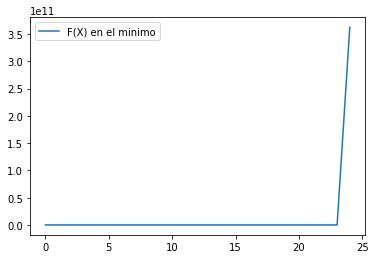

In [26]:
datos_Rastrigin2a[['F(X) en el minimo']].plot()

In [27]:
Rastrigin5a_min, Rastrigin5a_max, Rastrigin5a_prom, Rastrigin5a_med, datos_Rastrigin5a = evaluador(fN_rastrigin, X0_5_a, var_sensibilidad)
print (f"El minimo de los minimo valor de la función en las 25 optimizaciones es: {Rastrigin5a_min}")
print ("El máximo de los minimo valor de la función en las 25 optimizaciones es: {}".format(Rastrigin5a_max))
print ("El promedio de los minimos de la función en las 25 optimizaciones es: " + str(Rastrigin5a_prom))
print ((f"La mediana del minimo del valor de la función en las 25 optimizaciones es: {Rastrigin5a_med}"))
datos_Rastrigin5a

El minimo de los minimo valor de la función en las 25 optimizaciones es: 75.64072098223843
El máximo de los minimo valor de la función en las 25 optimizaciones es: 4451586723423.134
El promedio de los minimos de la función en las 25 optimizaciones es: 186018021333.91724
La mediana del minimo del valor de la función en las 25 optimizaciones es: 1485.06851186925


/media/user/disco_1Tb_1/Unal/Maestria/CEOH/03_Tarea_1/optimizador_BFGS.py:120: RuntimeWarning: divide by zero encountered in double_scalars
  ro = 1.0 / (np.dot(yk, sk))
/media/user/disco_1Tb_1/Unal/Maestria/CEOH/03_Tarea_1/optimizador_BFGS.py:122: RuntimeWarning: invalid value encountered in multiply
  A1 = I - ro * sk[:, np.newaxis] * yk[np.newaxis, :]
/media/user/disco_1Tb_1/Unal/Maestria/CEOH/03_Tarea_1/optimizador_BFGS.py:123: RuntimeWarning: invalid value encountered in multiply
  A2 = I - ro * yk[:, np.newaxis] * sk[np.newaxis, :]


,Paso,Iteraciones para convergencia,gradiente en el minimo,F(X) en el minimo,Coordenadas
0,0.010,921,9.923841e-03,6.701614e+02,"[-13.576102049483168, 5.523140847414617, -6.538360234152739, -15.58762589292574, -8.548855208692899]"
1,0.093,2500,6.148755e+02,7.947831e+04,"[-32.58537066283007, -94.66285782992726, 7.5591779174154, 40.22402486337997, -260.2135755224587]"
2,0.176,2500,3.738942e+01,4.011417e+03,"[33.7927497407304, -19.6328630331195, -26.56609172906274, -7.9762119785086805, -40.78915731879647]"
3,0.259,799,7.666405e-03,1.559550e+03,"[30.776995649429406, -5.533157234697446, -7.964226919132939, -18.90226158651691, -10.559539931739]"
4,0.342,345,8.868797e-03,1.410587e+03,"[-14.926218111423685, -18.902264504418145, -0.005014323976155886, -23.86765103116427, -15.920424952676496]"
5,0.425,338,9.538395e-03,9.171543e+02,"[-24.85972757443626, 4.969688014678834, 7.954208484554032, -11.942962963221088, 7.954227854279349]"
6,0.507,303,5.124454e-03,7.102985e+02,"[7.954230517318374, 2.9798433338176014, -5.974562788926116, -10.948368444226286, 21.87237607329653]"
7,0.590,1241,8.780741e-03,1.973464e+03,"[-29.702203806743793, -21.625819826118356, -22.633026305842435, -3.522843675696439, -3.5228530516808756]"
8,0.673,309,7.394228e-03,1.262464e+03,"[-3.9847888947562016, 13.566090299244463, -27.8317649822403, -10.94837176382503, -11.942945967734776]"
9,0.756,236,9.725933e-03,4.208578e+02,"[4.969665853072985, 4.969683394886433, -15.920439906939652, -5.9745612945238395, -8.958983485485854]"


<AxesSubplot:>

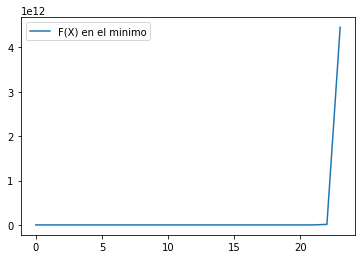

In [28]:
datos_Rastrigin5a[['F(X) en el minimo']].plot()

In [29]:
Rastrigin10a_min, Rastrigin10a_max, Rastrigin10a_prom, Rastrigin10a_med, datos_Rastrigin10a = evaluador(fN_rastrigin, X0_10_a, var_sensibilidad)
print (f"El minimo de los minimo valor de la función en las 25 optimizaciones es: {Rastrigin10a_min}")
print ("El máximo de los minimo valor de la función en las 25 optimizaciones es: {}".format(Rastrigin10a_max))
print ("El promedio de los minimos de la función en las 25 optimizaciones es: " + str(Rastrigin10a_prom))
print ((f"La mediana del minimo del valor de la función en las 25 optimizaciones es: {Rastrigin10a_med}"))
datos_Rastrigin10a

/media/user/disco_1Tb_1/Unal/Maestria/CEOH/03_Tarea_1/optimizador_BFGS.py:120: RuntimeWarning: divide by zero encountered in double_scalars
  ro = 1.0 / (np.dot(yk, sk))
/media/user/disco_1Tb_1/Unal/Maestria/CEOH/03_Tarea_1/optimizador_BFGS.py:122: RuntimeWarning: invalid value encountered in multiply
  A1 = I - ro * sk[:, np.newaxis] * yk[np.newaxis, :]
/media/user/disco_1Tb_1/Unal/Maestria/CEOH/03_Tarea_1/optimizador_BFGS.py:123: RuntimeWarning: invalid value encountered in multiply
  A2 = I - ro * yk[:, np.newaxis] * sk[np.newaxis, :]


El minimo de los minimo valor de la función en las 25 optimizaciones es: 1112.274824608764
El máximo de los minimo valor de la función en las 25 optimizaciones es: 2.706221889194626e+29
El promedio de los minimos de la función en las 25 optimizaciones es: 1.1766182126933166e+28
La mediana del minimo del valor de la función en las 25 optimizaciones es: 62005.315656614286


,Paso,Iteraciones para convergencia,gradiente en el minimo,F(X) en el minimo,Coordenadas
0,0.010,5000,1.074630e+04,2.901519e+07,"[-882.9448584808443, 2278.655887408751, -132.2570439424688, -2079.395142481854, 2021.9669344681672, -1210.764830076802, 513.635503294941, 1451.7768089401739, 3118.432347769144, 1025.3945554341478]"
1,0.093,5000,1.419440e+03,5.094083e+05,"[-126.06760579991845, 20.40088175293707, 397.7425561937982, -421.30862732790683, 96.66127297416166, -240.58619391048575, -181.64419670414375, 62.18216122926999, -90.62165326222352, -212.09094720964112]"
2,0.176,5000,3.269564e+02,1.262784e+04,"[-23.69663470803097, 16.189389602076464, 20.090780461726794, -79.19301175173716, -0.9571803740916809, 53.251199812938346, 6.888951909470568, 22.409767295692056, -3.731248184016053, 40.483012831717524]"
3,0.259,5000,1.154370e+03,3.408820e+05,"[-128.9843828741163, 25.913991754313162, -45.00210721427301, 74.00053835572113, 118.03580957938944, -183.01629995061882, -297.8783810278054, 30.549867930243728, -417.0436427313187, 70.91327454035248]"
4,0.342,5000,8.506826e+02,1.801530e+05,"[81.93516132835104, -168.23273241126688, 67.87927237244115, 191.29317174797458, 43.96142566110803, 96.98523837094749, -68.88150101532183, 212.61883680157896, 205.90739499016175, -13.6760613526316]"
5,0.425,5000,3.164146e+02,3.382024e+04,"[-45.01993523708286, -78.75215899949437, 1.9354892030511206, 97.92139507500892, -64.97889028025448, 69.88877989611888, 12.041056940201475, 49.00225451000075, -62.91031985753288, 19.16626929931107]"
6,0.507,1140,7.045917e-03,1.913452e+03,"[12.560507489798471, -1.5126487336353853, -22.633035747141417, -13.576111033563457, 5.523154090364448, -1.5126437544198679, 5.523162160172899, -22.633027488854257, 12.560501627333016, 11.554979935033147]"
7,0.590,5000,4.073353e+02,3.164976e+04,"[54.0535123833675, 1.6122186118571795, 35.41837364657824, -91.12596351326944, -5.224762600672241, 34.68042641310625, -46.807392635183845, 106.4261032390629, 48.14348377012278, 44.66280193215383]"
8,0.673,606,5.625978e-03,1.500201e+03,"[-8.958990575286677, -19.89585647531697, -0.005002773455729647, -9.953706138225993, 4.969690658118692, 20.879236684719444, 7.954229432225232, -5.974559798826385, 18.892270959117774, -0.004994988227266767]"
9,0.756,2866,8.894373e-03,1.162959e+03,"[13.921879357324029, 22.865201280573224, 2.979855750827694, 1.9849090201215411, -2.9898483099949105, 3.9747825744813805, -6.969418780904728, -0.9999551855465848, -9.95370503291505, 15.910412894310527]"


<AxesSubplot:>

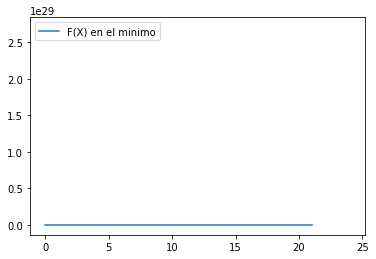

In [30]:
datos_Rastrigin10a[['F(X) en el minimo']].plot()